# Shortest Path in a Stochatic Network
*by Thibaut Rousseaux and Gabriel Razafindratsima*

## Problematic ##

&nbsp;&nbsp;&nbsp;In a network with fixed topology the throughput of arcs (hops) can change at each step. 

The task will be to **optimize the stochatic rules of routing the message**

## Approach ##

  &nbsp;&nbsp;&nbsp; In this first approach we will create a network with a fixed probability in each arcs (that the message will take the arcs). So the sum of the probability equal 1.

In [1]:
import numpy as np
import random
import sys
import networkx as nx
from networkx.drawing.nx_agraph import write_dot
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import graphviz




### Init the Network

In [161]:
numberStates = 4 #Total number of states
stable = 2
unstable = 6

#Sequence of events
events = [['12'], ['22', '23', '24'], ['33', '34'], ['44']]

# Transition matrix
transitionMatrix = [['1.0,5,2'], ['0.3333333333333333,1,2', '0.3333333333333333,7,6', '0.3333333333333333,3,6'], ['0.5,6,2', '0.5,7,2'], ['1.0,6,2']]

#if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
#  sys.exit("Transition matrix doesn't have the awaited total")



### creating a NetworkX graph

In [171]:

#Graph
G = nx.MultiDiGraph()


# initializing with same weight for every arcs
for e in transitionMatrix:
  for i in range(0,len(e)):
    e[i][0]= 1/len(e)

Filling edges for the graph
for i in range(0,len(events)):
  for e in range(0,len(events[i])):
    G.add_edges_from([tuple(list(events[i][e]))],weight=transitionMatrix[i][e][1],label=transitionMatrix[i][e])



#print(G.get_edge_data("1","2")[0]['weight'])

[[['11', '12', '13', '14'], ['22', '23'], ['34'], []], [['0.25,1,2', '0.25,9,6', '0.25,9,6', '0.25,5,2'], ['0.5,7,2', '0.5,5,2'], ['1.0,5,2'], []]]
[[['11', '12', '14'], ['23', '24'], ['33', '34'], ['44']], [['0.3333333333333333,8,2', '0.3333333333333333,9,2', '0.3333333333333333,9,2'], ['0.5,5,6', '0.5,1,2'], ['0.5,3,2', '0.5,5,2'], ['1.0,2,2']]]
[[['11', '12'], ['22', '23'], ['34'], ['44']], [['0.5,1,2', '0.5,9,6'], ['0.5,6,2', '0.5,8,6'], ['1.0,3,2'], ['1.0,9,2']]]
[[['11', '12', '14'], ['22', '23'], ['33', '34'], []], [['0.3333333333333333,3,2', '0.3333333333333333,3,2', '0.3333333333333333,8,2'], ['0.5,4,2', '0.5,3,2'], ['0.5,3,2', '0.5,9,2'], []]]
[[['12'], ['22', '23'], ['33', '34'], ['44']], [['1.0,2,2'], ['0.5,9,2', '0.5,7,2'], ['0.5,5,2', '0.5,1,2'], ['1.0,3,6']]]
[[['11', '12', '14'], ['22', '23'], ['34'], []], [['0.3333333333333333,6,6', '0.3333333333333333,6,2', '0.3333333333333333,5,2'], ['0.5,4,2', '0.5,6,2'], ['1.0,9,2'], []]]
[[['11', '12'], ['22', '23'], ['33', '34'],

### Print the graph

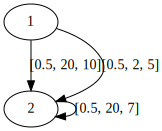

In [157]:
pos=nx.spring_layout(G)
write_dot(G,'graph.dot')

with open("graph.dot") as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)

### Function

    generateNetworks(numberOfNetworks)
is used to generate all the networks for tests

    addToTab()  
is used to store all the data of the path

    activity()
is used to determine where the message will be sent

In [197]:
def setNetwork(network):
    localGraph = nx.MultiDiGraph()
    LocaltransitionMatrix = network[1]
    Localevents = network[0]
    for i in range(0,len(Localevents)):
        for e in range(0,len(Localevents[i])):
            listValue = list(LocaltransitionMatrix[i][e].split(","))
            listValue = list(map(float, listValue))
            print(listValue)
            localGraph.add_edges_from([tuple(list(Localevents[i][e]))],weight=listValue[1],label=listValue)
    
    return localGraph

def addToTab(activityList):
  tabStates = []
  if not any(d.get('Path') == str(activityList) for d in tabStates):
    tabStates.append({
      "Path" : str(activityList),
      "count":1,
      "stepCount": len(activityList)-1
    })
  else:
    for d in tabStates:
      if(d.get('Path') == str(activityList)):
        d['count'] = d['count'] + 1

def generateNetworks(numberOfNetworks):
  tabNetworks = []
  for i in range(0,numberOfNetworks):
    events = [[[]]]
    for x in range(numberStates):
        newState = []
        values = []
        count = 0
        event = x+1
        prob=60
        #count != 2 and
        while event <= numberStates: # 2 to change by 4, the 2 in the for is to be switched to 8 (9 states)
            if random.randrange(100) < prob or event==x+2:
                transition = str(x+1)+str(event)
                newState.append(transition)
                count += 1
            event += 1
            prob -= 5
        nbTransitions = len(newState)
        #We can't use the last while as we need to know the total number of transition to get the same availability on each
        for p in range(0,nbTransitions):
            availability = 1/nbTransitions
            weight = random.randrange(1,10)
            #weight can't = 0
            if random.randrange(1,10) > 7:
              power = str(availability)+","+str(weight)+","+str(unstable)
            else:
              power = str(availability)+","+str(weight)+","+str(stable)
            values.append(power)
        if events == [[[]]]:
            events = [[newState],[values]]
        else:
            events[0].append(newState)
            events[1].append(values)
    tabNetworks.append(events)
  return tabNetworks
    #print(events)
#The output "events" gives for each iteration (100) the possible paths of a network

def activity(network):
  #Starting state
    i = 0
    while i != iteration:
      y = 0
      firstState ="1"
      activityList = [firstState]
      i += 1 
      while firstState != str(numberStates):
        pas = 0
        you = 1
        change = np.random.choice(events[y],replace=True,p=transitionMatrix[y])
        while pas != 1:
          if change == events[y][0]:
            activityList.append(events[y][0][-1])
            change = np.random.choice(events[y],replace=True,p=transitionMatrix[y])
          elif change == events[y][you]:
            newState = events[y][you][-1]
            firstState = newState
            activityList.append(newState)
            pas = 1
          else:
            you += 1
        y += 1
      addToTab(activityList)



### Launching the simulation

In [199]:
#tabNetwoks = generateNetworks(10)
network  = tabNetwoks[1]
mygraph = setNetwork(network)
pos=nx.spring_layout(mygraph)
print(tabNetwoks)
#tabStates = []
# parameter to know the number of iterations (1 in order to make it work properly with 1 iteration )
#activity(1000)


#### Sorting the tab and creating a dataFrame ####
#tabStates = sorted(tabStates, key = lambda i: i['count'],reverse=True)

#dfStates = pd.DataFrame(tabStates)

#print(dfStates)

[0.25, 4.0, 6.0]
[0.25, 5.0, 2.0]
[0.25, 4.0, 2.0]
[0.25, 1.0, 2.0]
[0.5, 7.0, 2.0]
[0.5, 7.0, 2.0]
[1.0, 5.0, 2.0]
[1.0, 7.0, 2.0]
[[[['11', '12', '13'], ['23'], ['33', '34'], []], [['0.3333333333333333,6,6', '0.3333333333333333,8,6', '0.3333333333333333,7,2'], ['1.0,5,2'], ['0.5,8,2', '0.5,9,2'], []]], [[['11', '12', '13', '14'], ['22', '23'], ['34'], ['44']], [['0.25,4,6', '0.25,5,2', '0.25,4,2', '0.25,1,2'], ['0.5,7,2', '0.5,7,2'], ['1.0,5,2'], ['1.0,7,2']]], [[['12', '13'], ['23', '24'], ['33', '34'], []], [['0.5,3,2', '0.5,4,2'], ['0.5,1,2', '0.5,7,2'], ['0.5,6,2', '0.5,4,6'], []]], [[['11', '12', '13', '14'], ['22', '23', '24'], ['34'], []], [['0.25,9,2', '0.25,4,2', '0.25,9,2', '0.25,1,2'], ['0.3333333333333333,5,2', '0.3333333333333333,5,2', '0.3333333333333333,1,2'], ['1.0,6,6'], []]], [[['11', '12', '14'], ['23'], ['33', '34'], ['44']], [['0.3333333333333333,9,2', '0.3333333333333333,7,6', '0.3333333333333333,3,2'], ['1.0,3,2'], ['0.5,6,2', '0.5,8,2'], ['1.0,2,2']]], [[['11'

### Example of exploitation of data

In [45]:
#### Creating a subset to compare the number of steps #####
subdfStates = dfStates[['count','stepCount']] 
subdfStates = subdfStates.groupby(['stepCount']).sum()
subdfStates.plot(kind='bar')

NameError: name 'dfStates' is not defined

In [46]:
### Creating a subset to compare the probability of arrival depending of the time
graph = subdfStates.cumsum(axis=0)
graph = graph/500
print(graph)
graph.plot()

NameError: name 'subdfStates' is not defined

# TO DO : 

- **Implement a Function to change the probability of throughput**
- **Implement a Function to choose a path naively**
- **Implement the Function to optimize the path choosing**
- **Implement control Function**
- **generate 100 scenario**
- **Test first routing rule 100 times**

In [94]:

def findBestPath(network):
    pathsTab = []
    visitedNode = ["1"]
    currentPath = ["1"]
    currentPathCost = 0
    currentState = "1"
    finalState = "5"
    while currentState != finalState:
        shortestArc = ""
        weightNeighor = 0
        print("## CurrentState:"+currentState)
        print("## Going through neigbors:"+str(list(network.neighbors(currentState))))
        print("## Current Path:"+str(currentPath))
        for e in list(network.neighbors(currentState)):
            path2add = list.copy(currentPath)
            weightNeighor = network.get_edge_data(currentState,e)[0]['weight']
            if e not in visitedNode:
                path2add.append(e)
                pathsTab.append({
                    "path" : path2add,
                    "weight" : currentPathCost+weightNeighor})
                print("## Adding :"+str(path2add))
            if shortestArc == "":
                shortestArc = e
            else:
                if weightNeighor < network.get_edge_data(currentState,shortestArc)[0]['weight']:
                    shortestArc = e
        print("## shortestArc is:" +  str(shortestArc))
        
        currentPathCost += network.get_edge_data(currentState,shortestArc)[0]['weight']
        print("## CurrentPathCost is:" +  str(currentPathCost))
        change = False
        for e in pathsTab:
            if currentPathCost > e['weight']:
                currentPath = e['path']
                shortestArc = e['path'][len(e['path'])-1]
                change = True
                print("## I CHANGE MY PLANS :"+str(currentState))
        if change == False:
            currentPath.append(shortestArc)
        print("## I Choose :"+str(shortestArc))
        currentState = shortestArc
        visitedNode.append(shortestArc)
        print(pathsTab)
    pathsTab.append({
    "path" : currentPath,
    "weight" : currentPathCost
    })
    print(visitedNode)
    print(pathsTab)
    print(currentPathCost)
    return currentPath


findBestPath(mygraph)

## CurrentState:1
## Going through neigbors:['1', '2', '3', '5']
## Current Path:['1']


TypeError: unsupported operand type(s) for +: 'int' and 'str'